In [126]:
#### bag of words

import numpy as np
import pandas as pd

with open("feature_construction_output_50_events_3hf.csv") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().split(",") for x in content]


In [127]:
#content

In [128]:
flattenedset = list(set([val for sublist in content for val in sublist]))
#(flattenedset)

In [129]:
mapping = {}
maps = enumerate(flattenedset)
## mapping event to index
for i,a in maps:
    mapping[a] = i

#print(mapping)

In [130]:
count=0
train = list()
labels = np.zeros(len(content))
for listing in content:
    seq = np.zeros(len(flattenedset))
    for i in range(0,len(listing)):
        if i ==0:
            continue
        else:
            seq[mapping[listing[i]]] = seq[mapping[listing[i]]]+1
#     print(seq)
    train.append(seq)
    labels[count] = listing[0]
    count = count+1
sequences = np.array(train)

In [131]:

#print (sequences.shape)
#for i in range(0,sequences.shape[0]):
#    sequences[i,:] = sequences[i,:] / np.max(sequences[i,:])

In [132]:
labels[:100]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [133]:
#seq_dict={}
#count=0
#for i in range(0,sequences.shape[0]):
#    for j in range(0,sequences.shape[1]):
#        if sequences[i][j]!=0:
#            seq_dict[(i,j)]=sequences[i][j]

In [134]:
#len(seq_dict)

In [148]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

dataSize = len(labels)
ind = np.random.permutation(dataSize)
nTest = int(0.20 * dataSize)

print (ind.shape)


(2310,)


In [149]:
test_indices = ind[:nTest]
train_indices = ind[nTest:]

print (len(test_indices))

462


In [150]:
train_set_x = sequences[train_indices]
train_set_y = labels[train_indices]
test_set_x = sequences[test_indices]
test_set_y = labels[test_indices]

print (train_set_x.shape,train_set_y.shape,test_set_x.shape,test_set_y.shape)

(1848, 4791) (1848,) (462, 4791) (462,)


In [151]:
train_set_x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [152]:
logistic = LogisticRegression()
logistic.fit(train_set_x, train_set_y)
pred = np.array(logistic.predict_proba(test_set_x))[:,1]
#print (pred)

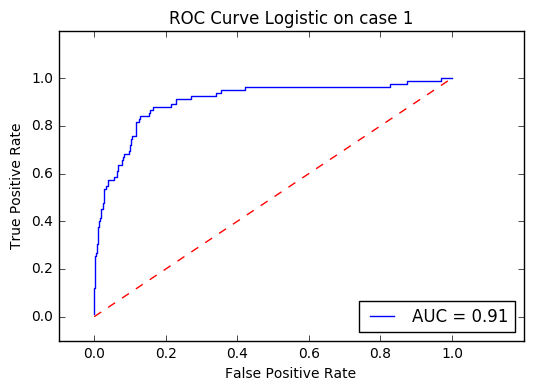

In [153]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_set_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC Curve Logistic on case 1')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
#from sklearn.decomposition import TruncatedSVD
#pca = TruncatedSVD(n_components=10)
#train_set_x = pca.fit_transform(train_set_x)


In [43]:
#train_set_x.shape

In [44]:
#test_set_x = pca.fit_transform(test_set_x)

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(train_set_x, train_set_y)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [156]:
pred = rf.predict_proba(train_set_x)[:,1]
false_positive_ratein, true_positive_ratein, thresholdsin = roc_curve(train_set_y, pred)
roc_aucin = auc(false_positive_ratein, true_positive_ratein)


In [157]:
pred2 = np.array(rf.predict_proba(test_set_x))[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_set_y, pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
#plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
#plt.show()

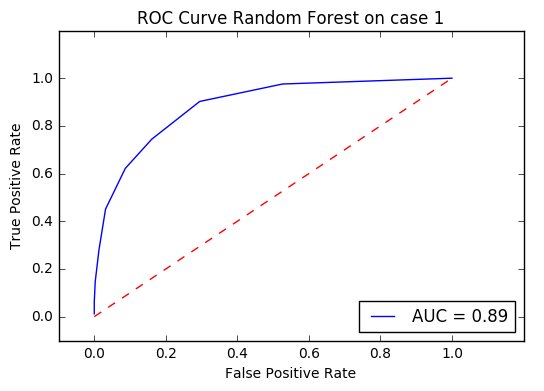

In [158]:
plt.title('ROC Curve Random Forest on case 1')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
# plt.plot(false_positive_ratein, true_positive_ratein, 'green',label='AUC = %0.2f'% roc_aucin)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [159]:
print (np.mean(cross_val_score(rf, sequences, labels, cv=10)))


0.846326090202


In [ ]:
#### bag of words

import numpy as np
import pandas as pd

with open("feature_construction_output_old.csv") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip().split(",") for x in content]


In [16]:
import pickle 
with open('emb.pkl', 'rb') as f:
    param = np.array(pickle.load(f, encoding='latin1'))#

In [18]:
param.shape

(100, 100)